In [ ]:
# Start writing code here...import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
import seaborn as sns
from datetime import datetime
from pandas_profiling import ProfileReport
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Importaciones

## Análisis exploratorio

In [ ]:
dfImportaciones = pd.read_excel('importaciones.xlsx', sheet_name='IMP-MES T', index_col=None, skiprows=6, nrows=257, usecols='B:AB')
dfImportaciones['Fecha'] = pd.to_datetime(dfImportaciones['Fecha'])
dfImportaciones['Anio'] = pd.DatetimeIndex(dfImportaciones['Fecha']).year
dfImportaciones['Mes'] = pd.DatetimeIndex(dfImportaciones['Fecha']).month
dfImportaciones.set_index('Fecha', inplace=True)
dfImportaciones = dfImportaciones[['Anio','Mes','Gasolina superior', 'Gasolina regular', 'Diesel']]
dfImportaciones.rename(columns = {'Gasolina superior':'Super', 'Gasolina regular':'Regular'}, inplace = True)
dfGeneralImportaciones = dfImportaciones
dfImportaciones.describe()

,Anio,Mes,Super,Regular,Diesel
count,257.000000,257.000000,2.570000e+02,257.000000,2.570000e+02
mean,2011.214008,6.431907,4.735221e+05,361665.432077,8.496115e+05
std,6.197665,3.464698,1.543325e+05,201498.204778,2.724270e+05
min,2001.000000,1.000000,1.702925e+05,81015.300000,2.297647e+05
25%,2006.000000,3.000000,3.608070e+05,201213.100000,6.694625e+05
50%,2011.000000,6.000000,4.459203e+05,291087.160000,8.168400e+05
75%,2017.000000,9.000000,5.732206e+05,510830.000000,1.029101e+06
max,2022.000000,12.000000,1.227174e+06,906104.050000,1.630636e+06


<AxesSubplot:xlabel='Anio', ylabel='Diesel'>

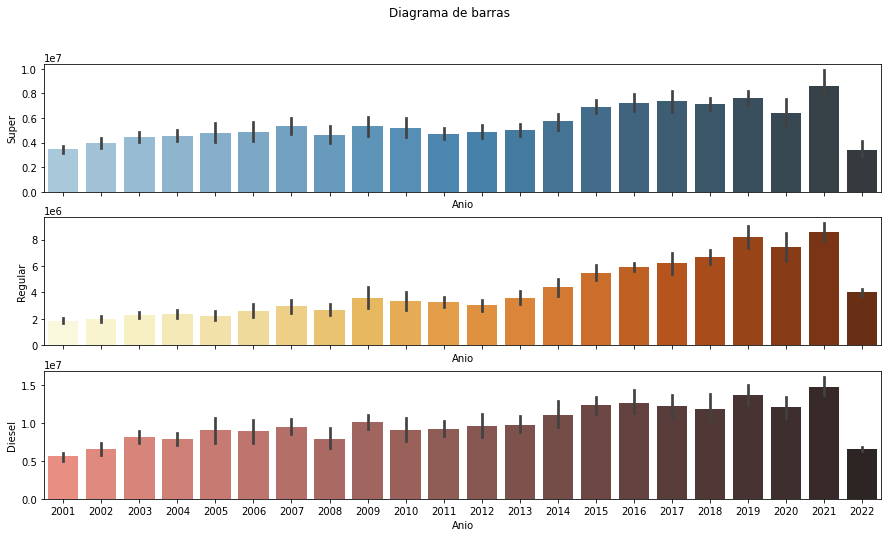

In [ ]:
fig, axes = plt.subplots(3, 1,sharex=True, figsize=(15, 8))
 
fig.suptitle('Diagrama de barras')
sns.barplot(ax=axes[0],  x="Anio", y="Super", data=dfImportaciones, estimator=sum, palette="Blues_d")
sns.barplot(ax=axes[1], x="Anio", y="Regular", data=dfImportaciones, estimator=sum, palette="YlOrBr")
sns.barplot(ax=axes[2], x="Anio", y="Diesel", data=dfImportaciones, estimator=sum, palette="dark:salmon_r")

<AxesSubplot:xlabel='Mes', ylabel='Diesel'>

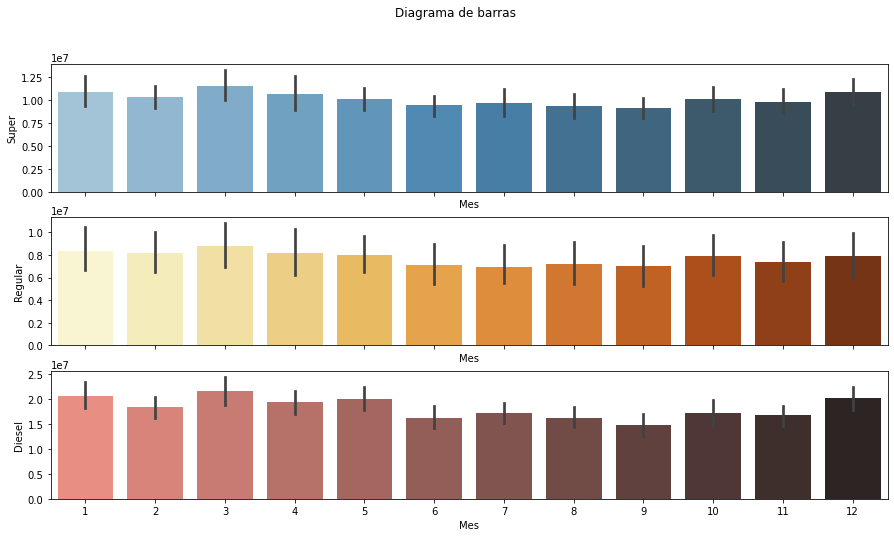

In [ ]:
fig, axes = plt.subplots(3, 1,sharex=True, figsize=(15, 8))
 
fig.suptitle('Diagrama de barras')
sns.barplot(ax=axes[0],  x="Mes", y="Super", data=dfImportaciones, estimator=sum, palette="Blues_d")
sns.barplot(ax=axes[1], x="Mes", y="Regular", data=dfImportaciones, estimator=sum, palette="YlOrBr")
sns.barplot(ax=axes[2], x="Mes", y="Diesel", data=dfImportaciones, estimator=sum, palette="dark:salmon_r")

<AxesSubplot:xlabel='Diesel', ylabel='Count'>

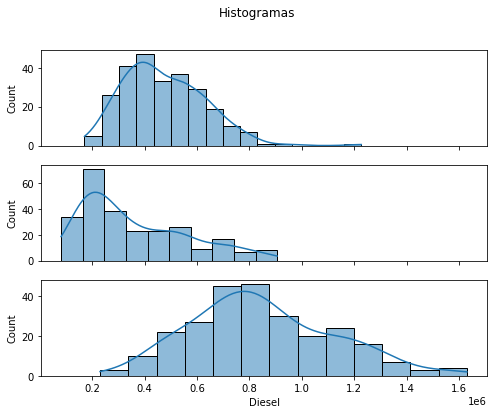

In [ ]:
fig, axes = plt.subplots(3, 1,sharex=True, figsize=(8, 6))
 
fig.suptitle('Histogramas')
sns.histplot(ax=axes[0], data=dfImportaciones, x="Super", kde=True)
sns.histplot(ax=axes[1], data=dfImportaciones, x="Regular", kde=True)
sns.histplot(ax=axes[2], data=dfImportaciones, x="Diesel", kde=True)

In [ ]:
#Extremos de precios de importaciones
print("El precio máximo de importaciones súper es {} y el mínimo es de {} ".format(dfImportaciones.max()[2], dfImportaciones.min()[2]))
print("El precio máximo de importaciones regular es {} y el mínimo es de {} ".format(dfImportaciones.max()[3], dfImportaciones.min()[3]))
print("El precio máximo de importaciones diesel es {} y el mínimo es de {} ".format(dfImportaciones.max()[4], dfImportaciones.min()[4]))

El precio máximo de importaciones súper es 1227173.53 y el mínimo es de 170292.5 
El precio máximo de importaciones regular es 906104.05 y el mínimo es de 81015.3 
El precio máximo de importaciones diesel es 1630635.6400000001 y el mínimo es de 229764.74 


## Series

In [ ]:
dfTestImportaciones = dfImportaciones[(dfImportaciones['Anio'].isin([2021,2022]))]
dfImportaciones = dfImportaciones[dfImportaciones.Anio != 2021]
dfImportaciones = dfImportaciones[dfImportaciones.Anio != 2022]
superImp = dfImportaciones['Super']
regularImp = dfImportaciones['Regular']
dieselImp = dfImportaciones['Diesel']
dfTestImportaciones

,Anio,Mes,Super,Regular,Diesel
Fecha,,,,,
2021-01-01,2021,1,642652.37,626537.48,1187144.34
2021-02-01,2021,2,726508.78,715261.34,1078028.01
2021-03-01,2021,3,850334.64,772750.01,1358525.23
2021-04-01,2021,4,1227173.53,634408.89,1289740.17
2021-05-01,2021,5,649783.14,669085.78,1279017.24
2021-06-01,2021,6,623695.20,833544.64,1441596.16
2021-07-01,2021,7,689717.29,833732.31,1133666.20
2021-08-01,2021,8,685977.45,664522.74,1177849.59
2021-09-01,2021,9,646233.31,844430.03,896539.24


<AxesSubplot:xlabel='Fecha', ylabel='Diesel'>

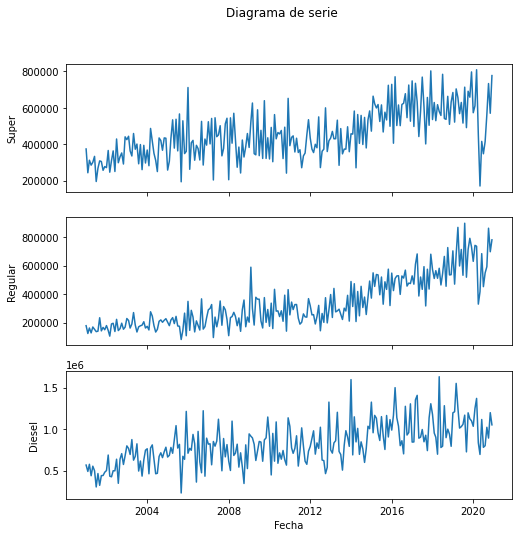

In [ ]:
fig, axes = plt.subplots(3, 1,sharex=True, figsize=(8, 8))
 
fig.suptitle('Diagrama de serie')
sns.lineplot(ax=axes[0], data=superImp)
sns.lineplot(ax=axes[1], data=regularImp)
sns.lineplot(ax=axes[2], data=dieselImp)

### Gasolina Súper

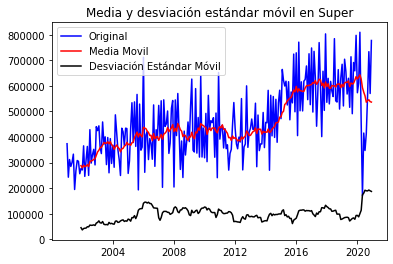

In [ ]:
# Se calcula la media móvil y la desviación estandar móvil.
mediaMovil = superImp.rolling(window=12).mean()
deMovil = superImp.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(superImp, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil en Super')
plt.rcParams["figure.figsize"] = (10,4)
plt.show(block=False)

Se puede apreciar que existe cierta tendencia por lo que es posible que no sea estacionaria en media. Tampoco parece ser estacionaria en varianza pero la descomposición de sus componentes ayuda más a ver esto.

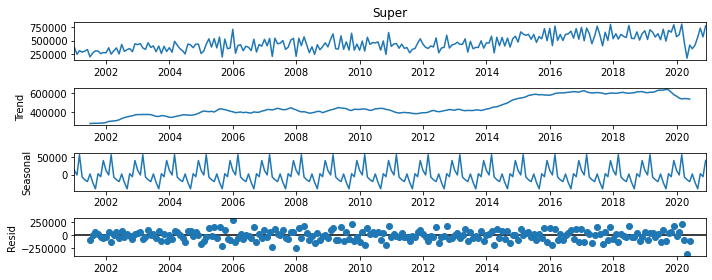

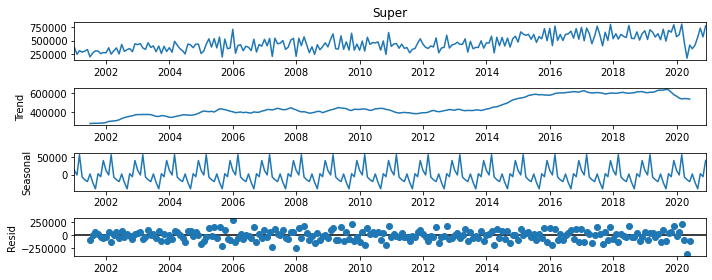

In [ ]:
descomposicion = seasonal_decompose(superImp)
descomposicion.plot()

En la descomposición se puede observar que hay tendencia por lo que la serie no parece ser estacionaria en media y tampoco en varianza.

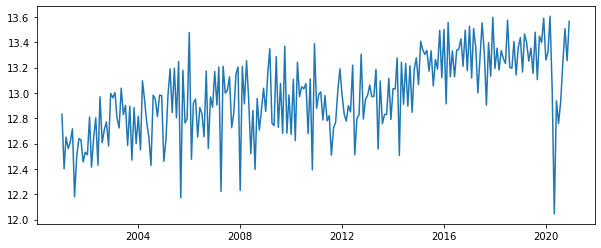

In [ ]:
superImplog = np.log(superImp)

plt.plot(superImplog)

In [ ]:
print('Resultados del Test de Dickey Fuller en gasolina Super')
dfTest = adfuller(superImp, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller en gasolina Super
Estadístico de prueba         -1.668566
p-value                        0.447377
# de retardos usados          10.000000
# de observaciones usadas    229.000000
Critical Value (1%)           -3.459233
Critical Value (5%)           -2.874245
Critical Value (10%)          -2.573541
dtype: float64


El p-value es mayor a 0.05 por lo que no se puede rechazar la hipótesis nula en donde afirmamos que existen raices unitarias. La serie por lo tanto, no es estacionaria en media, a lo que se recurre una diferenciación

In [ ]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie de gasolina Super')
superImp_diff = superImp.diff()
superImp_diff.dropna(inplace=True)
dfTest = adfuller(superImp_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie de gasolina Super
Estadístico de prueba       -8.686282e+00
p-value                      4.154994e-14
# de retardos usados         9.000000e+00
# de observaciones usadas    2.290000e+02
Critical Value (1%)         -3.459233e+00
Critical Value (5%)         -2.874245e+00
Critical Value (10%)        -2.573541e+00
dtype: float64


Se hace una diferenciación y ahí si queda.

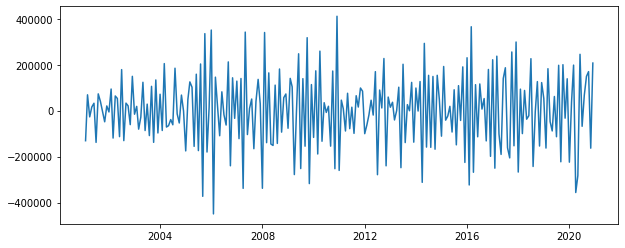

In [ ]:
plt.plot(superImp_diff)

Se tuvo que aplicar una transformación logarítmica y una diferenciación. Podemos decir que la serie es estacionaria ahora en media y en varianza. Toca ahora estimar los parámetros del modelo.

In [ ]:
superImplog_diff = superImplog.diff()
superImplog_diff.dropna(inplace = True)
tsa_acf = acf(superImplog_diff,nlags=5,fft=False)
tsa_pacf = pacf(superImplog_diff, nlags=36)
tsa_acf

array([ 1.        , -0.67864155,  0.30845903, -0.18436066,  0.11517626,
       -0.09968923])

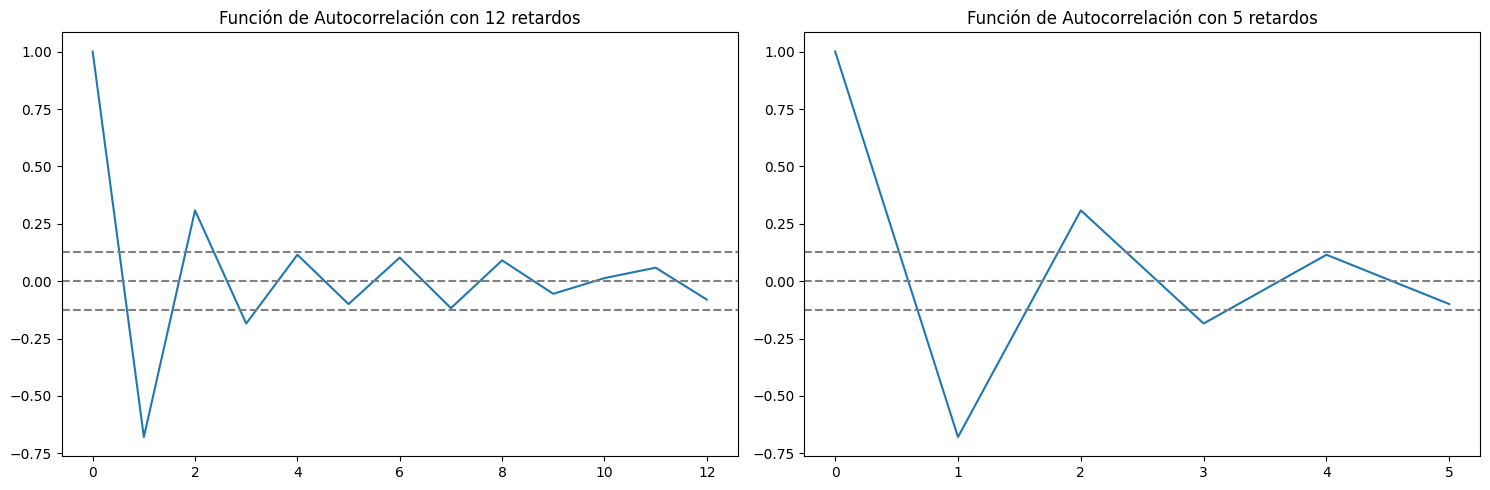

In [ ]:
#plot PAC
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(superImplog_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(superImplog_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

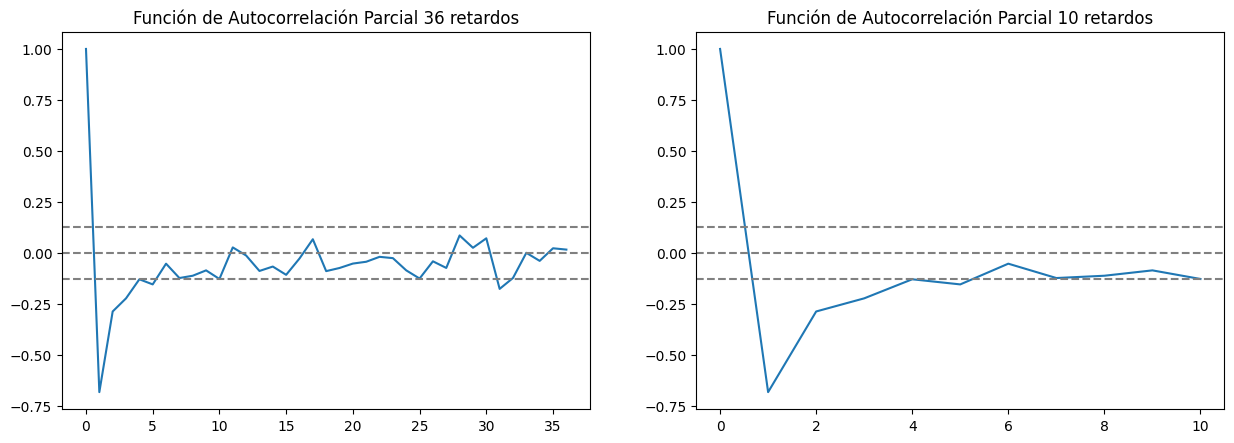

In [ ]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(superImplog_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(superImplog_diff, nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 10 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Con los gráficos dados, podemos observar que tenemos un valor p=5 q=3 & d=1. Otro posible modelo podría ser el p=3 q=3 & d=1

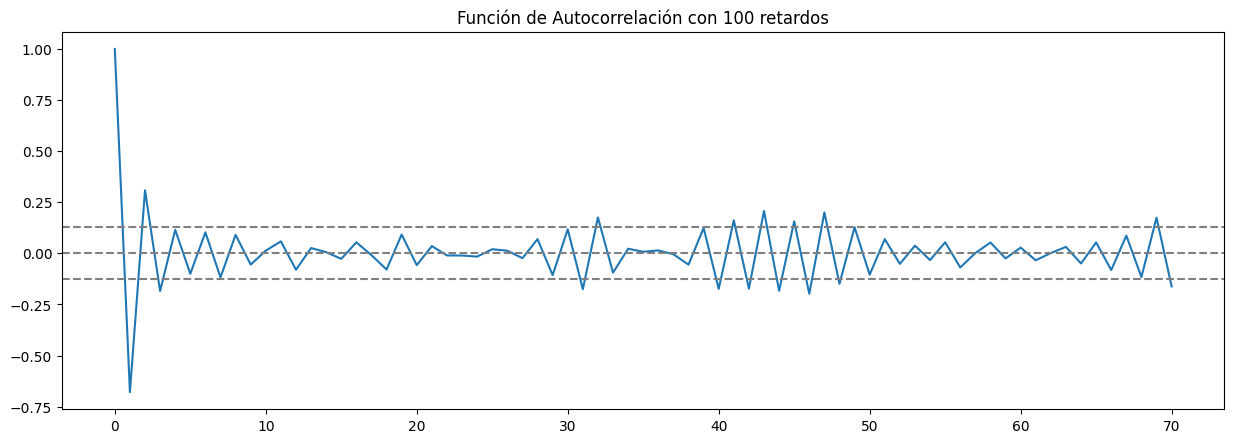

In [ ]:
plt.plot(acf(superImplog_diff,nlags=70,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 100 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

In [ ]:
superImp_log_D = superImplog.diff(31)
superImp_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

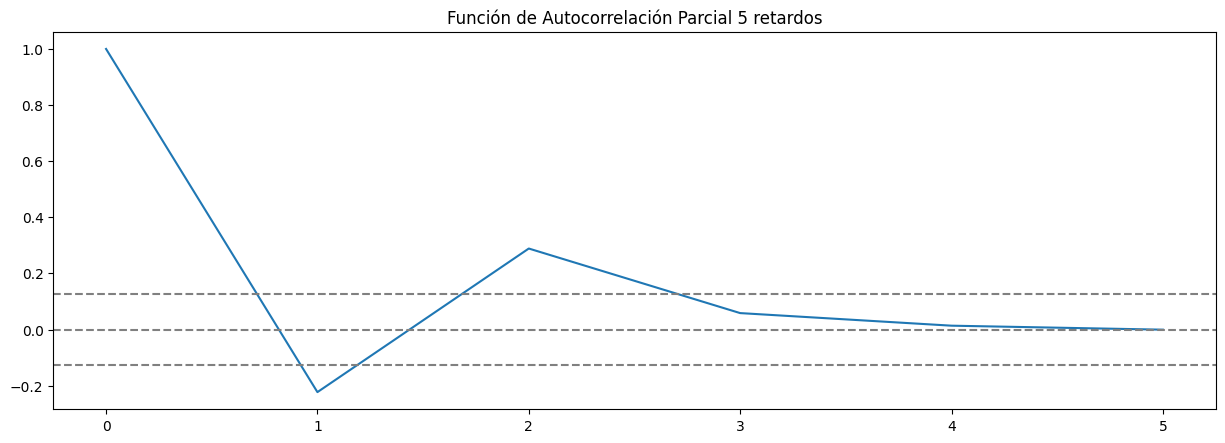

In [ ]:
plt.plot(pacf(superImp_log_D, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

P=2

In [ ]:
modelo513 = SARIMAX(superImplog, order=(5,1,3), enforce_stationarity=False, enforce_invertibility=False)
resultado_m513 = modelo513.fit()
print(resultado_m513.summary().tables[1])

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88710D-01    |proj g|=  5.78390D+00

At iterate    5    f=  4.50244D-02    |proj g|=  3.41206D+00

At iterate   10    f=  1.39018D-02    |proj g|=  2.50670D-01

At iterate   15    f=  1.07605D-02    |proj g|=  4.85492D-01

At iterate   20    f=  1.00826D-02    |proj g|=  4.18974D-01

At iterate   25    f=  9.80725D-03    |proj g|=  1.18158D-01

At iterate   30    f=  9

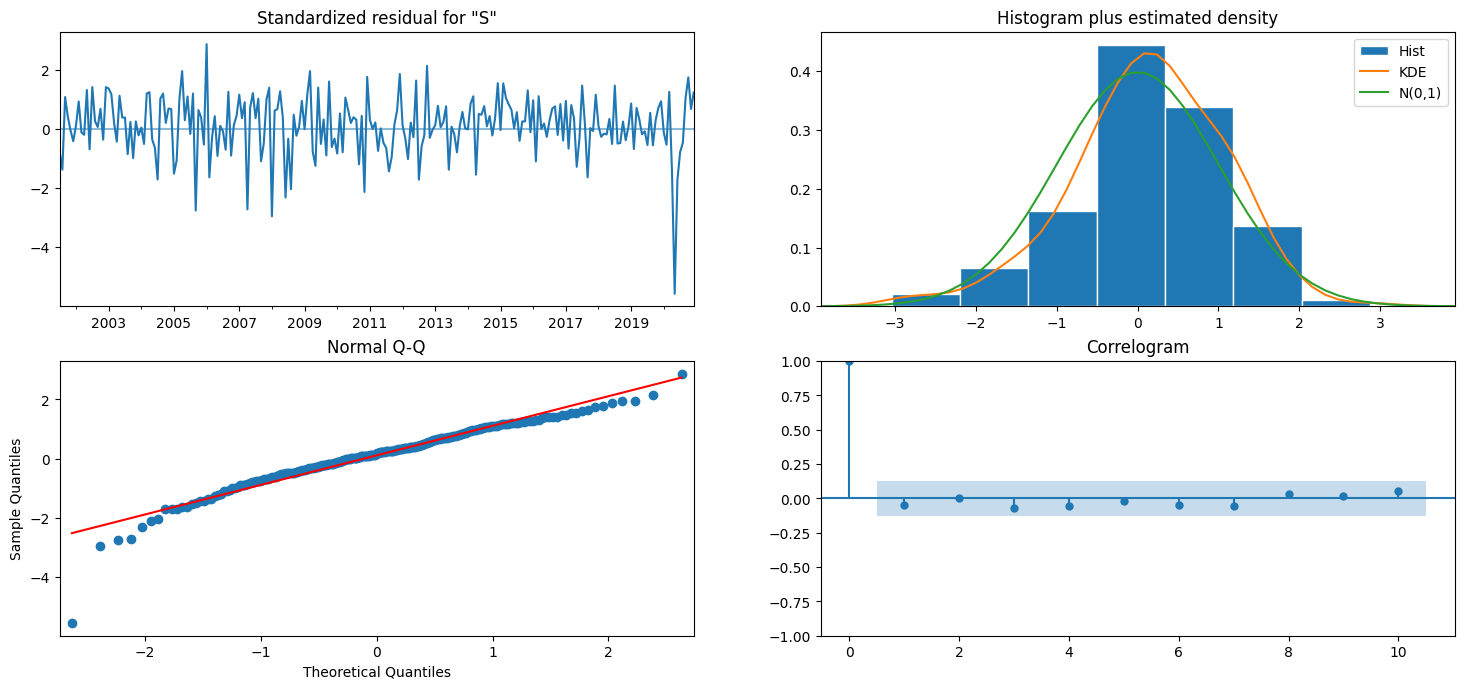

In [ ]:
resultado_m513.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
modelo313 = SARIMAX(superImplog, order=(3,1,3), enforce_stationarity=False, enforce_invertibility=False)
resultado_m313 = modelo313.fit()
print(resultado_m513.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72668D-01    |proj g|=  7.81475D-01

At iterate    5    f=  2.32660D-02    |proj g|=  1.08113D+00

At iterate   10    f= -3.64179D-03    |proj g|=  1.84965D-02

At iterate   15    f= -4.14343D-03    |proj g|=  2.04942D-02

At iterate   20    f= -4.15507D-03    |proj g|=  4.33208D-03

At iterate   25    f= -4.35773D-03    |proj g|=  2.82059D-02

At iterate   30    f= -4.42421D-03    |proj g|=  5.67346D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

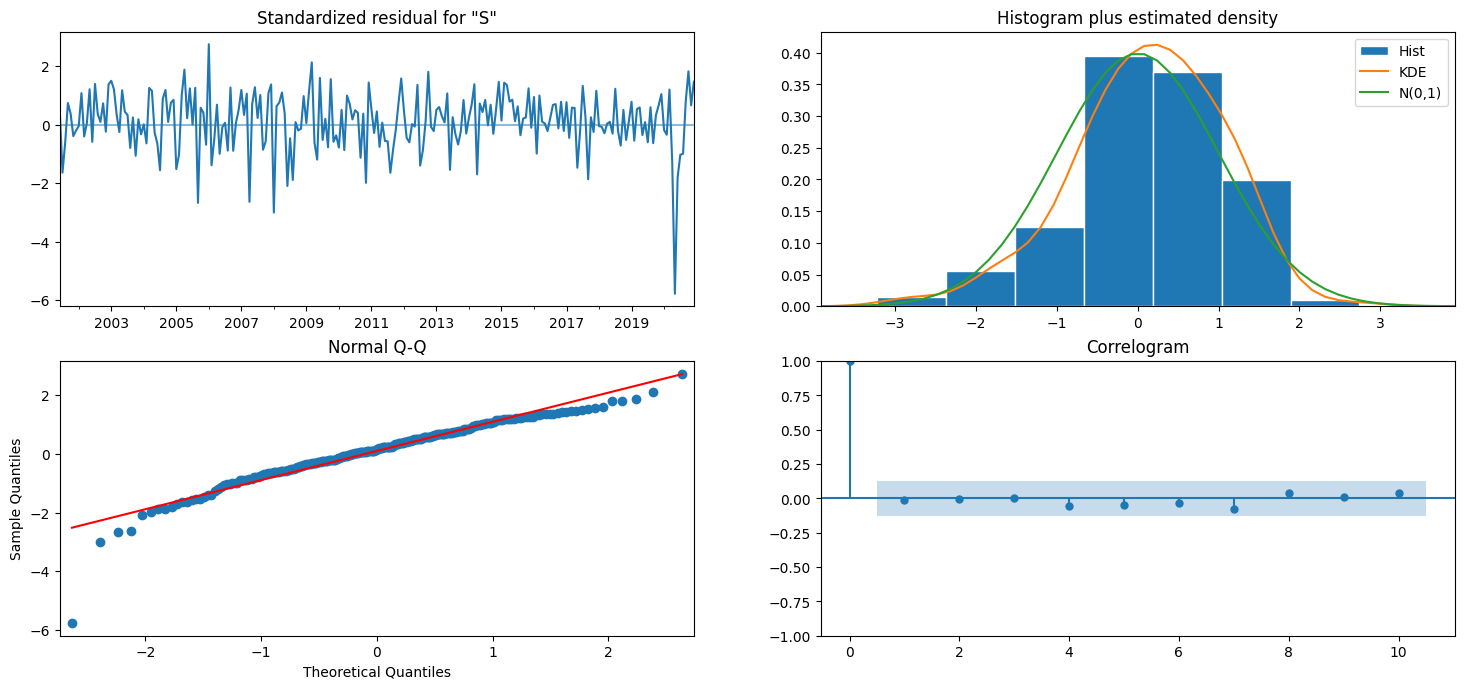

In [ ]:
resultado_m313.plot_diagnostics(figsize=(18, 8))
plt.show()

En este otro modelo tampoco existen autocorrelaciones significativas y parecen estar distribuidos de forma normal

In [ ]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 513=",resultado_m513.aic)
print("Modelo 313=",resultado_m313.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 513=",resultado_m513.bic)
print("Modelo 313=",resultado_m313.bic)

Resultados de AIC (Akaike information criterion)
Modelo 513= 21.36054603637344
Modelo 313= 11.876378065214697
Resultados de BIC (Bayesian information criterion)
Modelo 513= 52.45843607459274
Modelo 313= 36.09347666422381


In [ ]:
dfTestImportaciones.index[0]

Timestamp('2021-01-01 00:00:00')

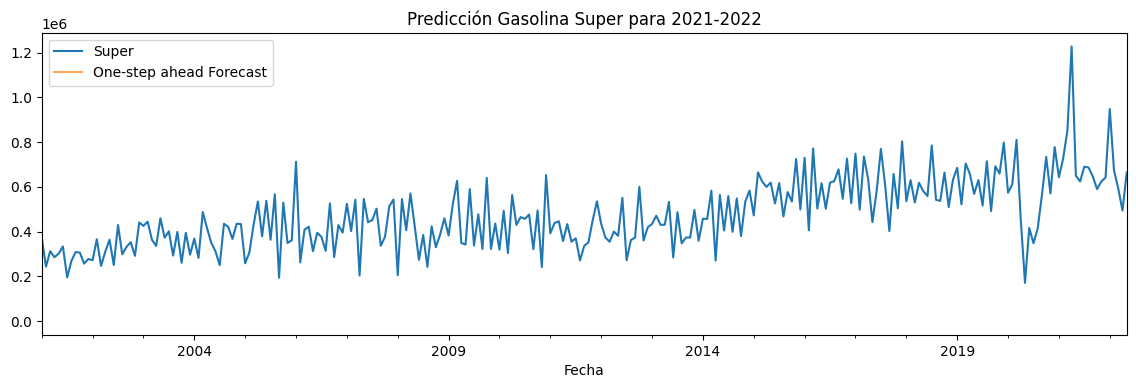

In [ ]:
dfTestSuper = dfTestImportaciones['Super']
ImpSup = dfGeneralImportaciones[['Super']].copy()
pred = resultado_m313.get_prediction(start=dfTestSuper.index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = ImpSup['2001-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)
plt.title("Predicción Gasolina Super para 2021-2022")
plt.legend()
plt.show()

pred

### Gasolina Regular

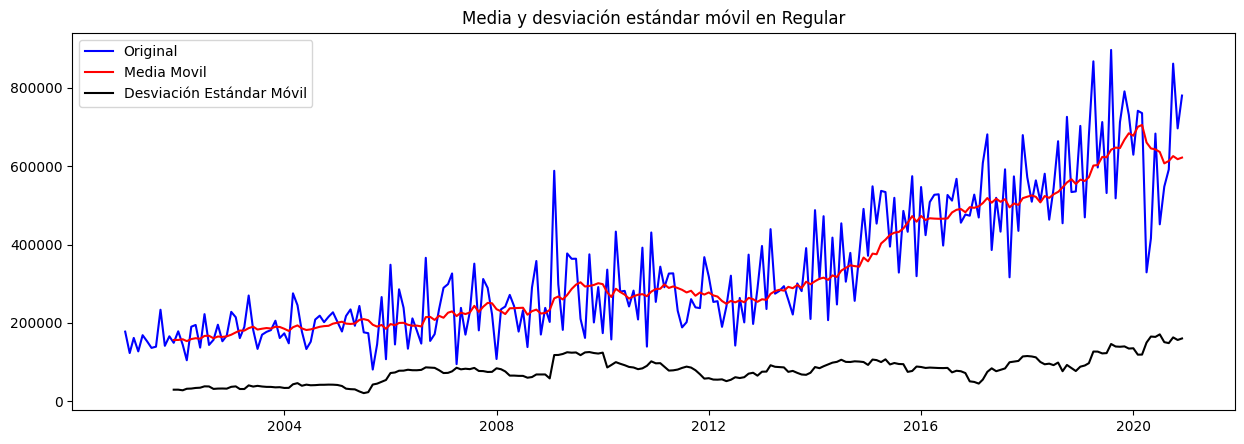

In [ ]:
# Se calcula la media móvil y la desviación estandar móvil.
mediaMovil = regularImp.rolling(window=12).mean()
deMovil = regularImp.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(regularImp, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil en Regular')
plt.rcParams["figure.figsize"] = (10,4)
plt.show(block=False)

Se puede apreciar que existe cierta tendencia por lo que es posible que no sea estacionaria en media. Tampoco parece ser estacionaria en varianza pero la descomposición de sus componentes ayuda más a ver esto.

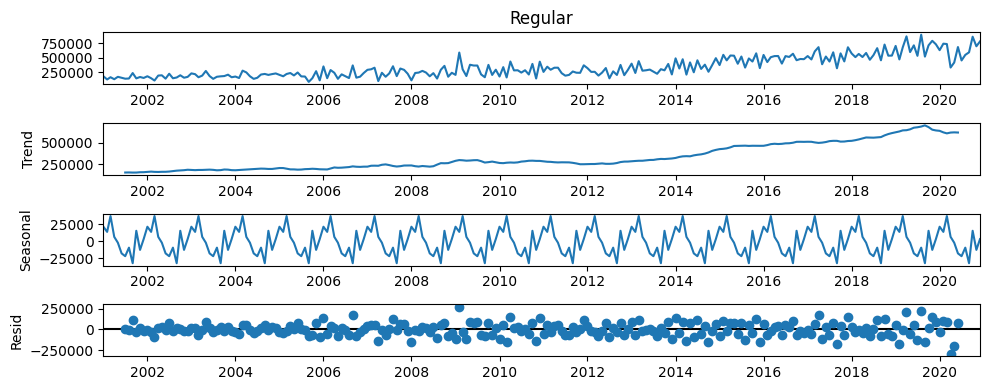

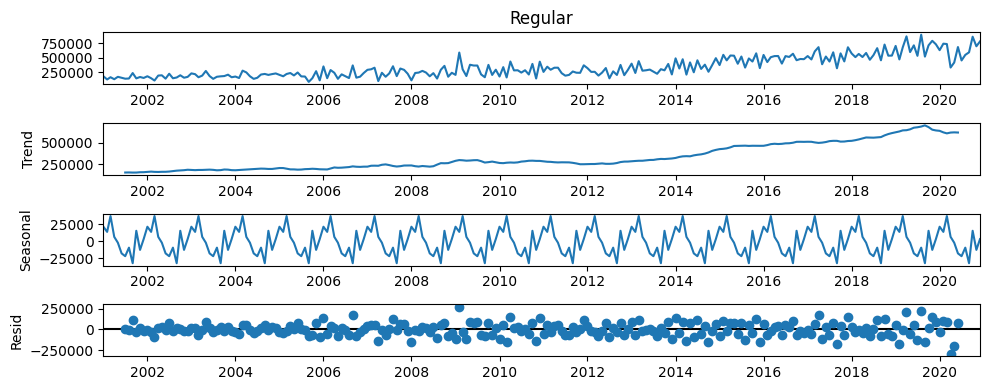

In [ ]:
descomposicion = seasonal_decompose(regularImp)
descomposicion.plot()

En la descomposición se puede observar que hay tendencia por lo que la serie no parece ser estacionaria en media y tampoco en varianza.

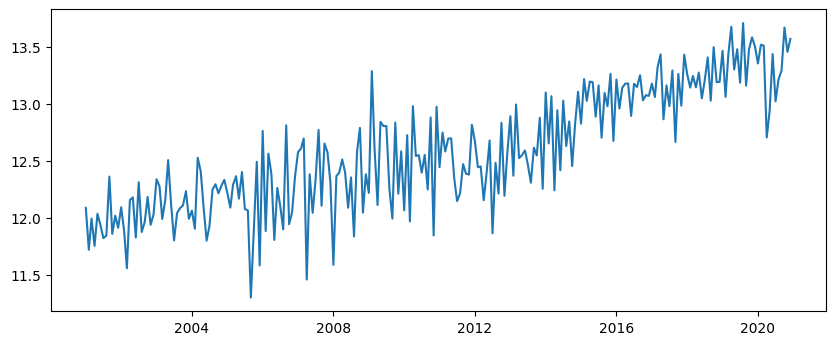

In [ ]:
regularImplog = np.log(regularImp)
plt.plot(regularImplog)

In [ ]:
print('Resultados del Test de Dickey Fuller en gasolina Regular')
dfTest = adfuller(regularImp, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller en gasolina Regular
Estadístico de prueba          0.400815
p-value                        0.981525
# de retardos usados          10.000000
# de observaciones usadas    229.000000
Critical Value (1%)           -3.459233
Critical Value (5%)           -2.874245
Critical Value (10%)          -2.573541
dtype: float64


El p-value es mayor a 0.05 por lo que no se puede rechazar la hipótesis nula en donde afirmamos que existen raices unitarias. La serie por lo tanto, no es estacionaria en media, a lo que se recurre una diferenciación

In [ ]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie de gasolina Regular')
regularImp_diff = regularImp.diff()
regularImp_diff.dropna(inplace=True)
dfTest = adfuller(regularImp_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie de gasolina Regular
Estadístico de prueba       -8.413340e+00
p-value                      2.075231e-13
# de retardos usados         9.000000e+00
# de observaciones usadas    2.290000e+02
Critical Value (1%)         -3.459233e+00
Critical Value (5%)         -2.874245e+00
Critical Value (10%)        -2.573541e+00
dtype: float64


Se hace una diferenciación y ahí si queda.

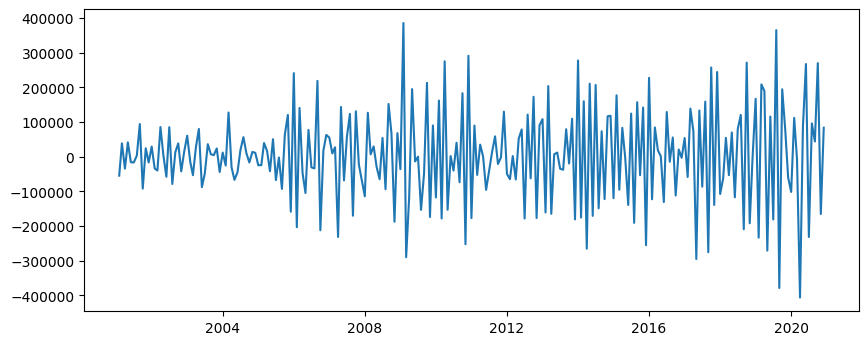

In [ ]:
plt.plot(regularImp_diff)

Se tuvo que aplicar una transformación logarítmica y una diferenciación. Podemos decir que la serie es estacionaria ahora en media y en varianza. Toca ahora estimar los parámetros del modelo.

In [ ]:
regularImplog_diff = regularImplog.diff()
regularImplog_diff.dropna(inplace = True)
tsa_acf = acf(regularImplog_diff,nlags=5,fft=False)
tsa_pacf = pacf(regularImplog_diff, nlags=36)
tsa_acf

array([ 1.        , -0.64116052,  0.23356991, -0.14251825,  0.05460697,
        0.04395474])

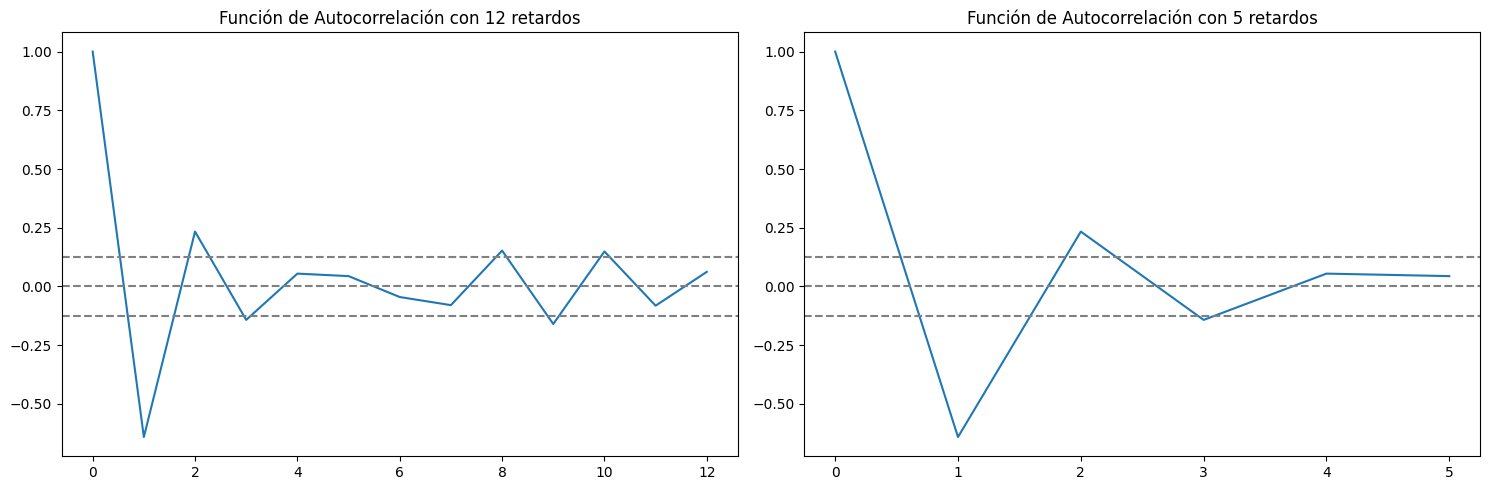

In [ ]:
#plot PAC
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(regularImplog_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(regularImplog_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

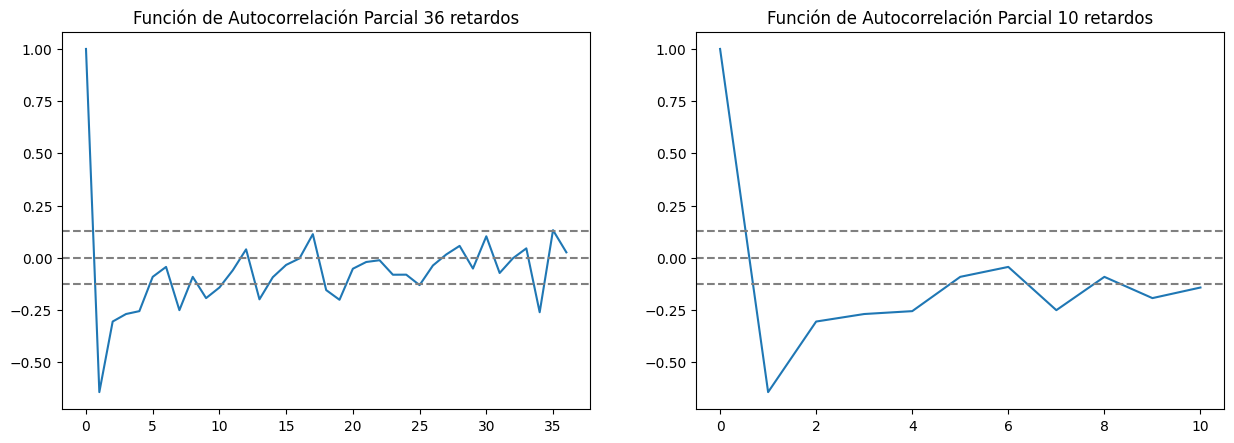

In [ ]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(regularImplog_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(regularImplog_diff, nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 10 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Con los gráficos dados, podemos observar que tenemos un valor p=19 q=2 & d=1. Otro posible modelo podría ser el p=34 q=2 & d=1

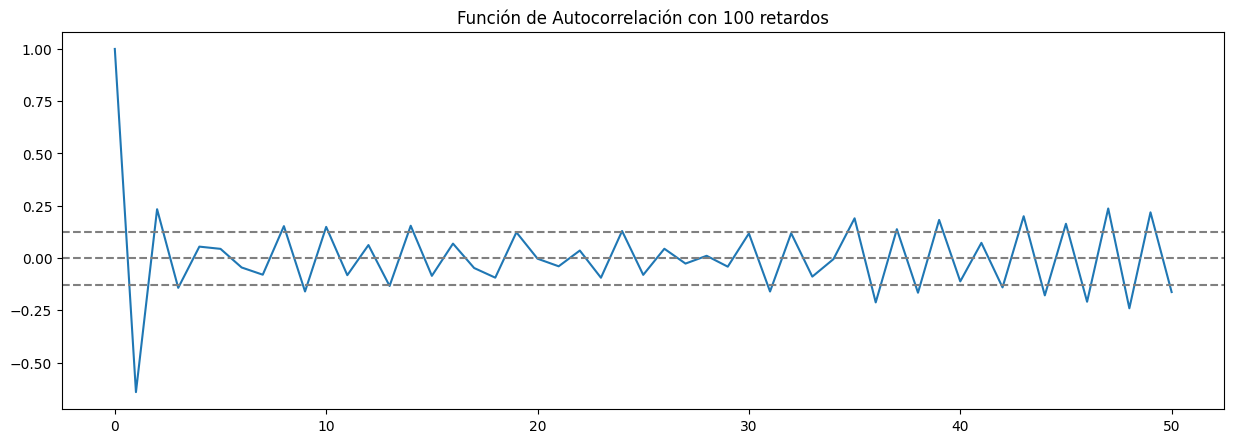

In [ ]:
plt.plot(acf(regularImplog_diff,nlags=50,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 100 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

In [ ]:
regularImp_log_D = regularImplog.diff(31)
regularImp_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

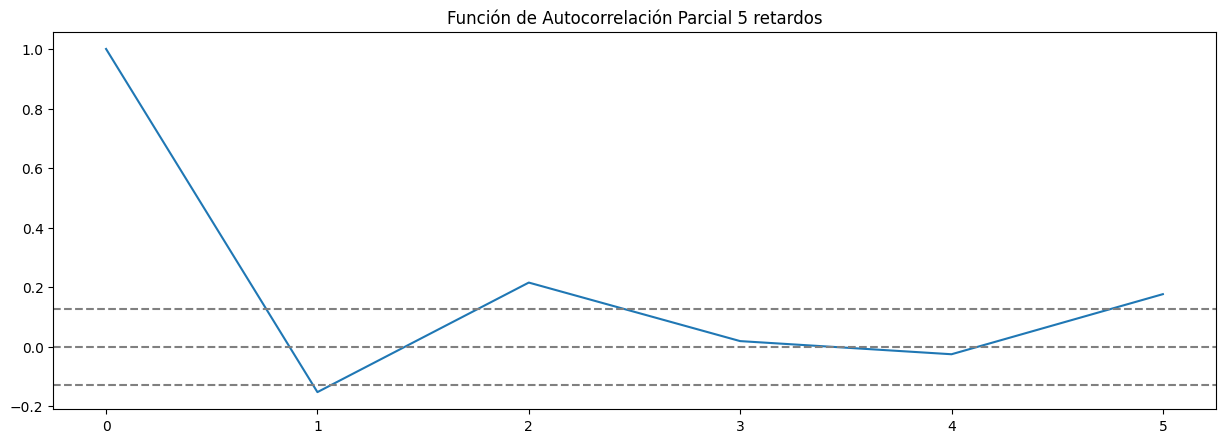

In [ ]:
plt.plot(pacf(regularImp_log_D, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(regularImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

P=2

In [ ]:
modelo1921 = SARIMAX(regularImplog, order=(19,1,2), enforce_stationarity=False, enforce_invertibility=False)
resultado_m1921 = modelo1921.fit()
print(resultado_m1921.summary().tables[1])

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           22     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63936D-01    |proj g|=  6.63805D+00

At iterate    5    f=  1.51397D-01    |proj g|=  5.75242D-01

At iterate   10    f=  9.12953D-02    |proj g|=  6.18167D-02

At iterate   15    f=  8.75696D-02    |proj g|=  1.98435D-02

At iterate   20    f=  8.62788D-02    |proj g|=  3.12451D-02

At iterate   25    f=  8.53863D-02    |proj g|=  1.64321D-02

At iterate   30    f=  8

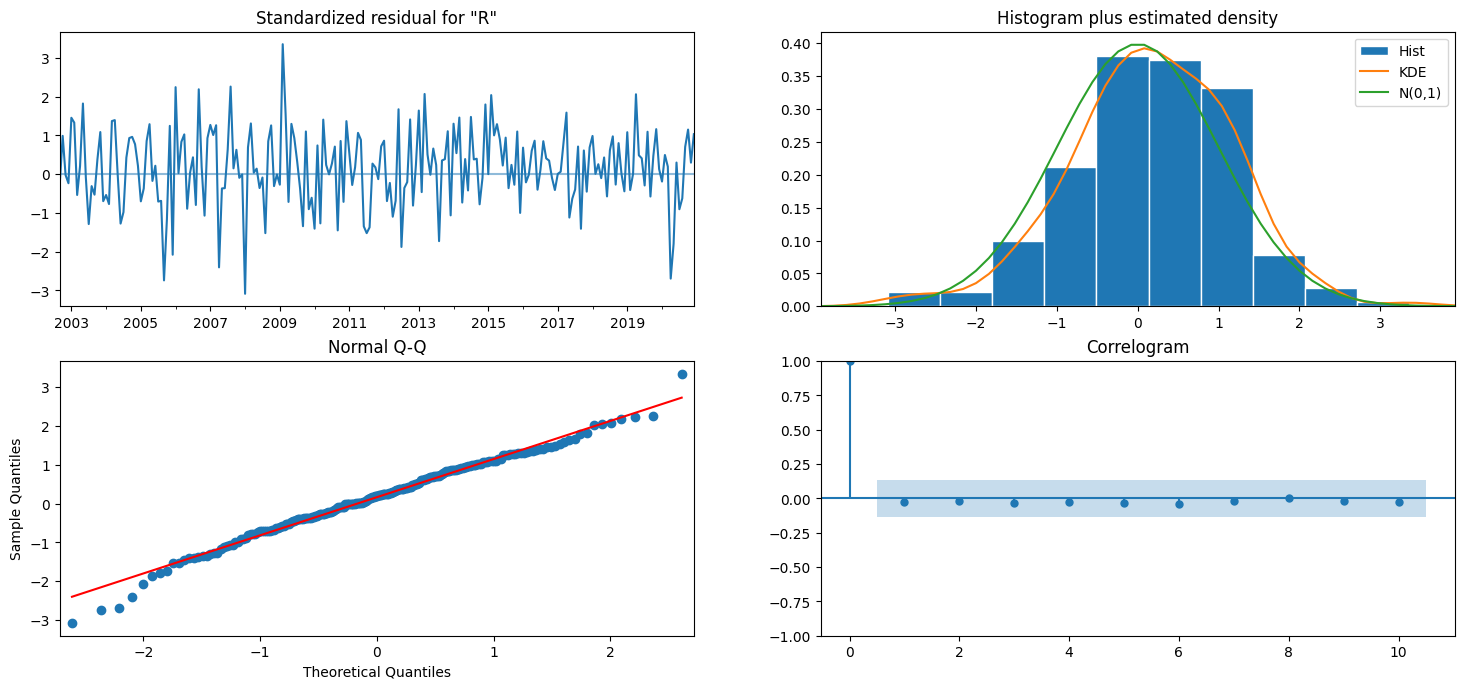

In [ ]:
resultado_m1921.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
modelo3421 = SARIMAX(regularImplog, order=(34,2,1), enforce_stationarity=False, enforce_invertibility=False)
resultado_m3421 = modelo3421.fit()
print(resultado_m3421.summary().tables[1])

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           36     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.21039D+00    |proj g|=  4.90831D+00

At iterate    5    f=  6.92278D-01    |proj g|=  1.15480D+00

At iterate   10    f=  4.11749D-01    |proj g|=  6.44969D-01

At iterate   15    f=  2.21835D-01    |proj g|=  1.77577D-01

At iterate   20    f=  1.21103D-01    |proj g|=  1.32039D-01

At iterate   25    f=  7.92897D-02    |proj g|=  4.10708D-01

At iterate   30    f=  6

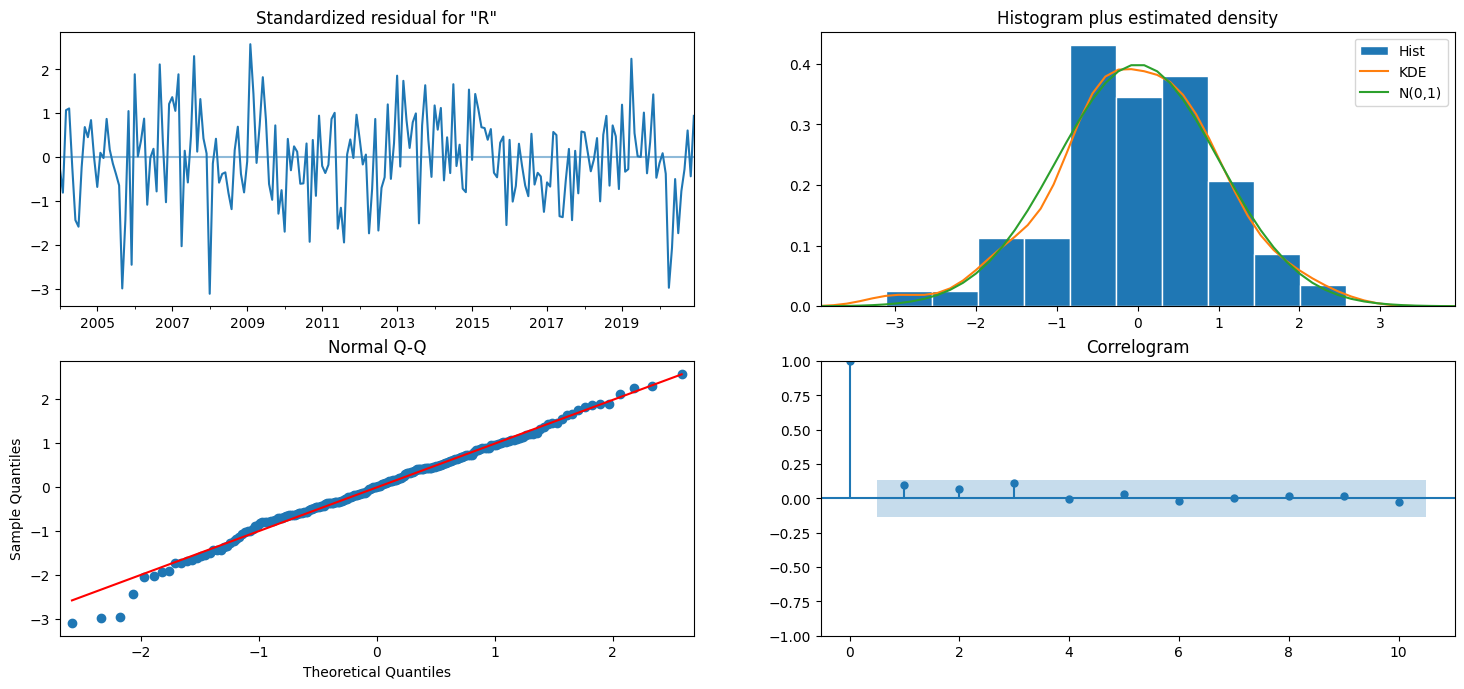

In [ ]:
resultado_m3421.plot_diagnostics(figsize=(18, 8))
plt.show()

En este otro modelo tampoco existen autocorrelaciones significativas y parecen estar distribuidos de forma normal

In [ ]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 1921=",resultado_m1921.aic)
print("Modelo 3421=",resultado_m3421.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 1921=",resultado_m1921.bic)
print("Modelo 3421=",resultado_m3421.bic)

Resultados de AIC (Akaike information criterion)
Modelo 1921= 82.88911970579196
Modelo 3421= 93.19769252062967
Resultados de BIC (Bayesian information criterion)
Modelo 1921= 157.54892572554388
Modelo 3421= 212.65001229902145


In [ ]:
dfTestImportaciones.index[0]

Timestamp('2021-01-01 00:00:00')

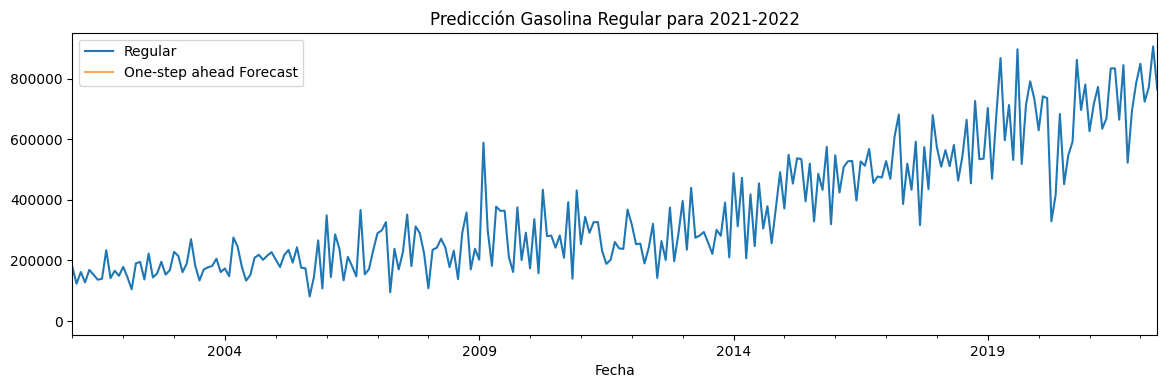

In [ ]:
dfTestRegular = dfTestImportaciones['Regular']
ImpReg = dfGeneralImportaciones[['Regular']].copy()
pred = resultado_m1921.get_prediction(start=dfTestRegular.index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = ImpReg['2001-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)
plt.title("Predicción Gasolina Regular para 2021-2022")
plt.legend()
plt.show()

pred

## Gasolina Diesel

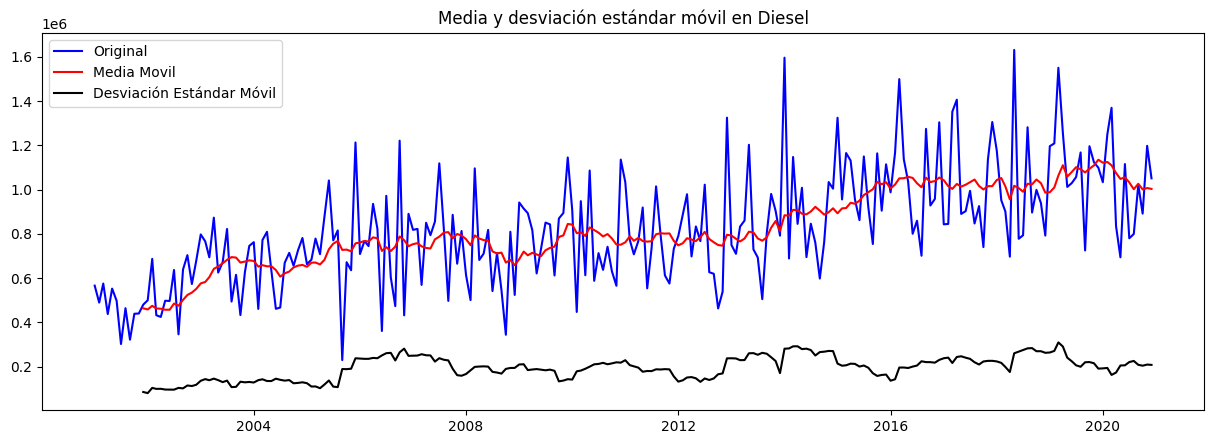

In [ ]:
# Se calcula la media móvil y la desviación estandar móvil.
mediaMovil = dieselImp.rolling(window=12).mean()
deMovil = dieselImp.rolling(window=12).std()
# Se grafican los resultados.
original = plt.plot(dieselImp, color="blue", label="Original")
media = plt.plot(mediaMovil, color='red', label = 'Media Movil')
ds = plt.plot(deMovil,color='black', label = 'Desviación Estándar Móvil')
plt.legend(loc = 'best')
plt.title('Media y desviación estándar móvil en Diesel')
plt.rcParams["figure.figsize"] = (10,4)
plt.show(block=False)

Se puede apreciar que existe cierta tendencia por lo que es posible que no sea estacionaria en media. Tampoco parece ser estacionaria en varianza pero la descomposición de sus componentes ayuda más a ver esto.

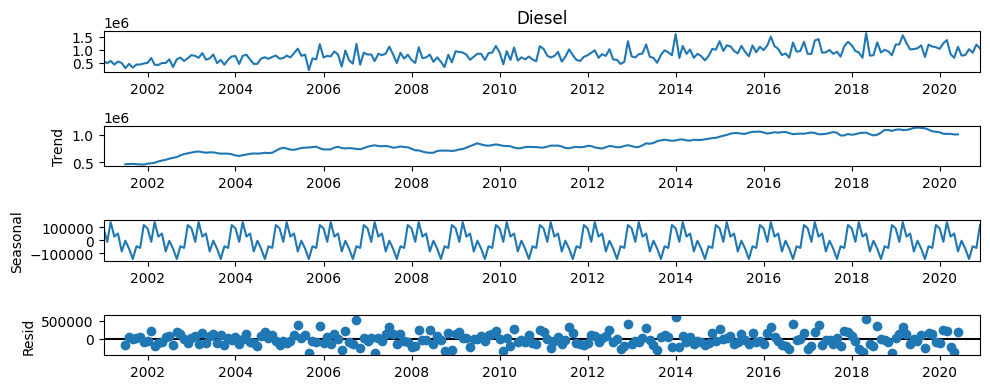

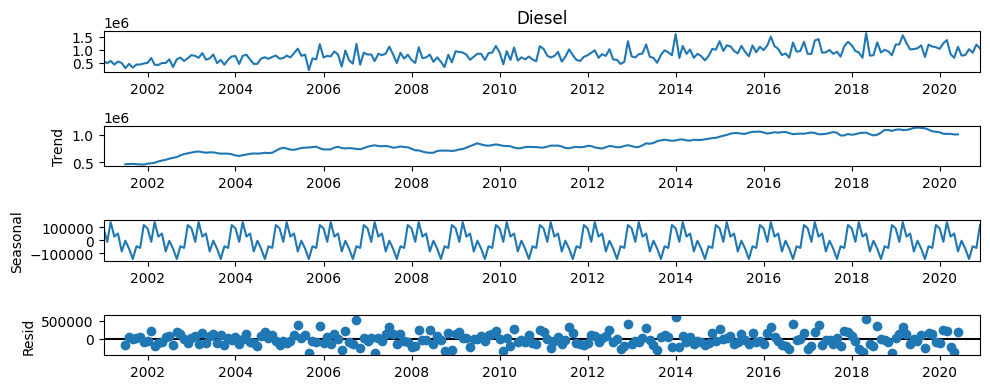

In [ ]:
descomposicion = seasonal_decompose(dieselImp)
descomposicion.plot()

En la descomposición se puede observar que hay tendencia por lo que la serie no parece ser estacionaria en media y tampoco en varianza.

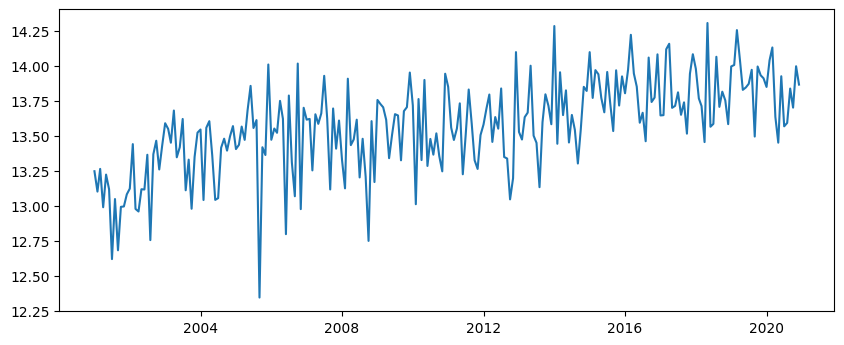

In [ ]:
dieselImplog = np.log(dieselImp)
plt.plot(dieselImplog)

In [ ]:
print('Resultados del Test de Dickey Fuller en gasolina Diesel')
dfTest = adfuller(dieselImp, autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller en gasolina Diesel
Estadístico de prueba         -1.939246
p-value                        0.313830
# de retardos usados          13.000000
# de observaciones usadas    226.000000
Critical Value (1%)           -3.459620
Critical Value (5%)           -2.874415
Critical Value (10%)          -2.573632
dtype: float64


El p-value es mayor a 0.05 por lo que no se puede rechazar la hipótesis nula en donde afirmamos que existen raices unitarias. La serie por lo tanto, no es estacionaria en media, a lo que se recurre una diferenciación

In [ ]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie de gasolina Diesel')
dieselImp_diff = dieselImp.diff()
dieselImp_diff.dropna(inplace=True)
dfTest = adfuller(dieselImp_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie de gasolina Diesel
Estadístico de prueba       -8.476721e+00
p-value                      1.428835e-13
# de retardos usados         1.200000e+01
# de observaciones usadas    2.260000e+02
Critical Value (1%)         -3.459620e+00
Critical Value (5%)         -2.874415e+00
Critical Value (10%)        -2.573632e+00
dtype: float64


Se hace una diferenciación y ahí si queda.

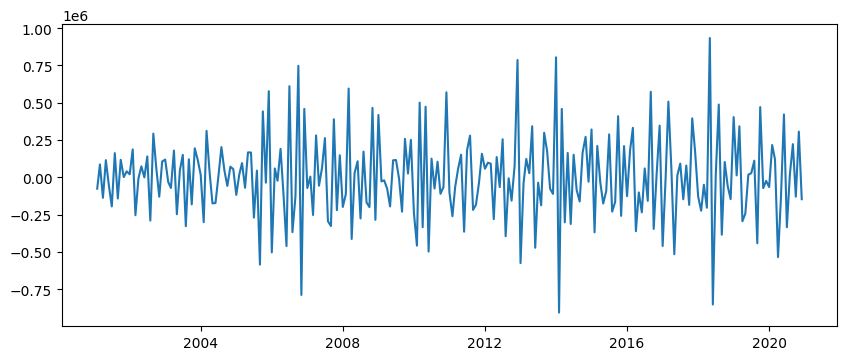

In [ ]:
plt.plot(dieselImp_diff)

Se tuvo que aplicar una transformación logarítmica y una diferenciación. Podemos decir que la serie es estacionaria ahora en media y en varianza. Toca ahora estimar los parámetros del modelo.

In [ ]:
dieselImplog_diff = dieselImplog.diff()
dieselImplog_diff.dropna(inplace = True)
tsa_acf = acf(dieselImplog_diff,nlags=5,fft=False)
tsa_pacf = pacf(dieselImplog_diff, nlags=36)
tsa_acf

array([ 1.        , -0.53319881,  0.07088559, -0.01466643, -0.07491364,
        0.13486183])

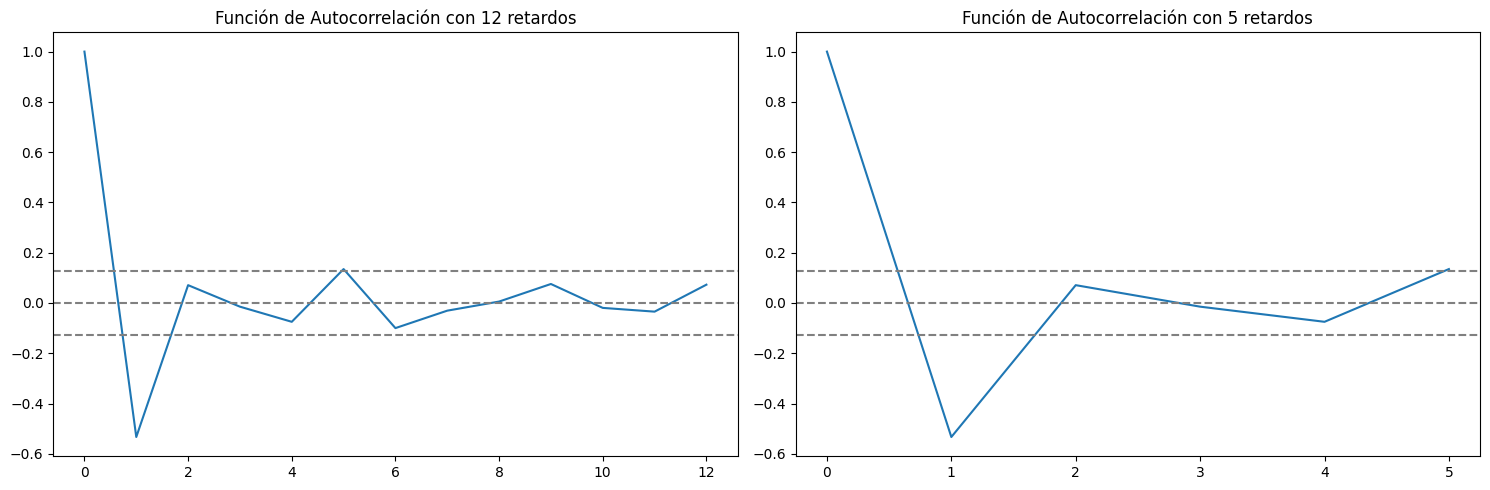

In [ ]:
#plot PAC
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

#Plot ACF: 
plt.subplot(121) 
plt.plot(acf(dieselImplog_diff,nlags=12,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 12 retardos')

plt.subplot(122) 
plt.plot(acf(dieselImplog_diff,nlags=5,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 5 retardos')

plt.tight_layout()

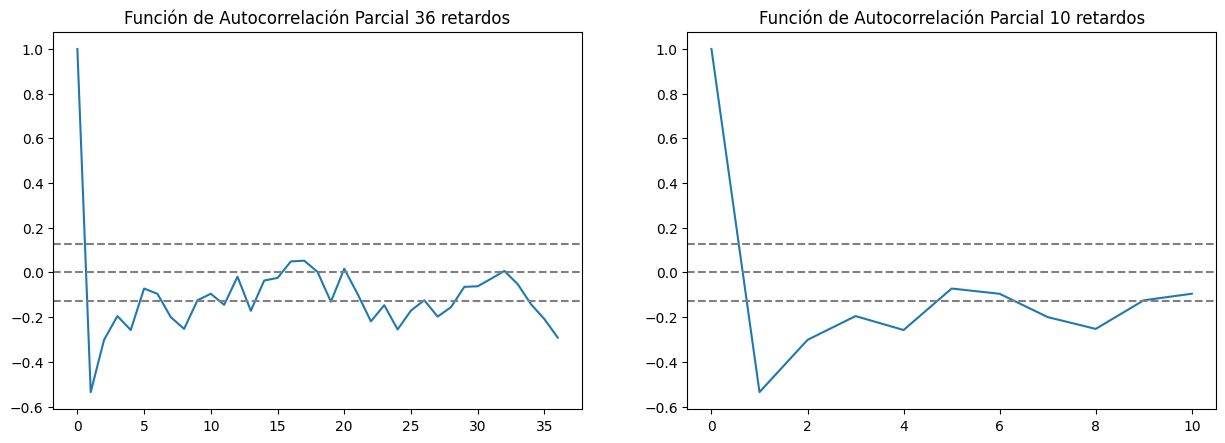

In [ ]:
#plot PACF
plt.subplot(121)
plt.plot(pacf(dieselImplog_diff, nlags=36))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 36 retardos')

plt.subplot(122)
plt.plot(pacf(dieselImplog_diff, nlags=10))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 10 retardos')

plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Con los gráficos dados, podemos observar que tenemos un valor p=8 q=1 & d=1. Otro posible modelo podría ser el p=4 q=1 & d=1

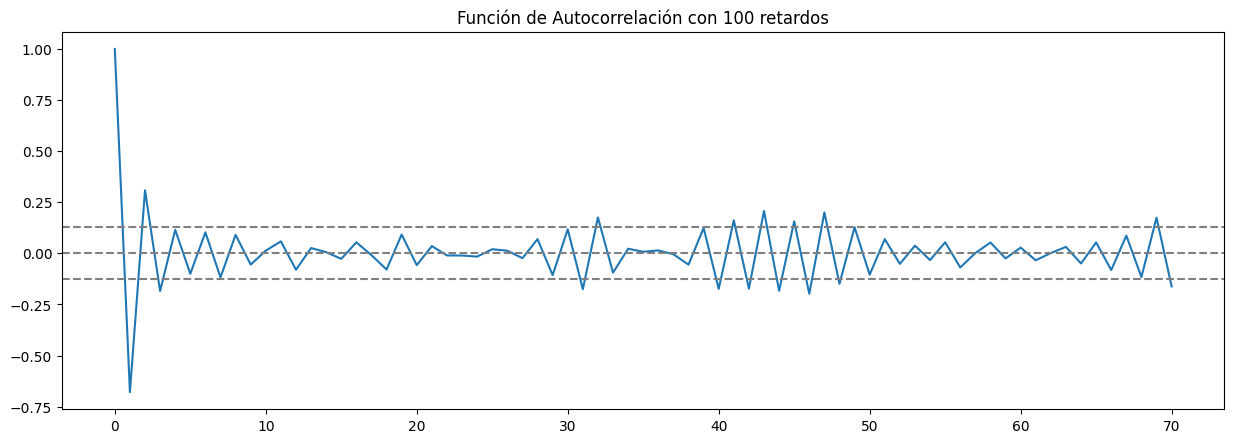

In [ ]:
plt.plot(acf(superImplog_diff,nlags=70,fft=False))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(superImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación con 100 retardos')
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 100 

In [ ]:
dieselImp_log_D = dieselImplog.diff(31)
dieselImp_log_D.dropna(inplace=True)

Text(0.5, 1.0, 'Función de Autocorrelación Parcial 5 retardos')

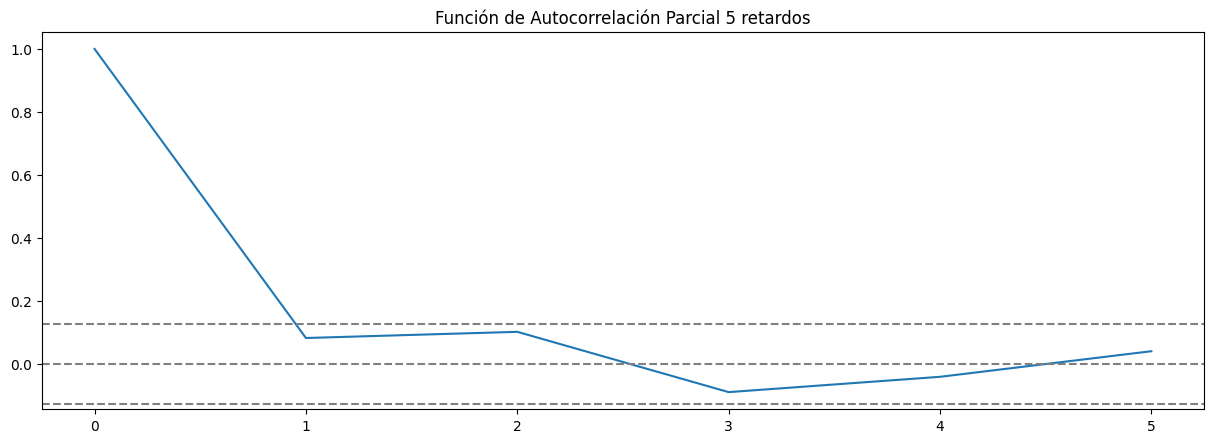

In [ ]:
plt.plot(pacf(dieselImp_log_D, nlags=5))
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dieselImplog_diff)),linestyle='--',color='gray')
plt.title('Función de Autocorrelación Parcial 5 retardos')

P=0

In [ ]:
modelo811 = SARIMAX(superImplog, order=(8,1,1), enforce_stationarity=False, enforce_invertibility=False)
resultado_m811 = modelo811.fit()
print(resultado_m513.summary().tables[1])

/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/root/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20730D-02    |proj g|=  6.00044D-01

At iterate    5    f= -7.10605D-03    |proj g|=  6.81466D-02

At iterate   10    f= -1.14790D-02    |proj g|=  1.46216D-02

At iterate   15    f= -1.21801D-02    |proj g|=  3.83087D-02

At iterate   20    f= -1.32190D-02    |proj g|=  7.76176D-03

At iterate   25    f= -1.32232D-02    |proj g|=  5.35241D-04

           * * *

Tit   

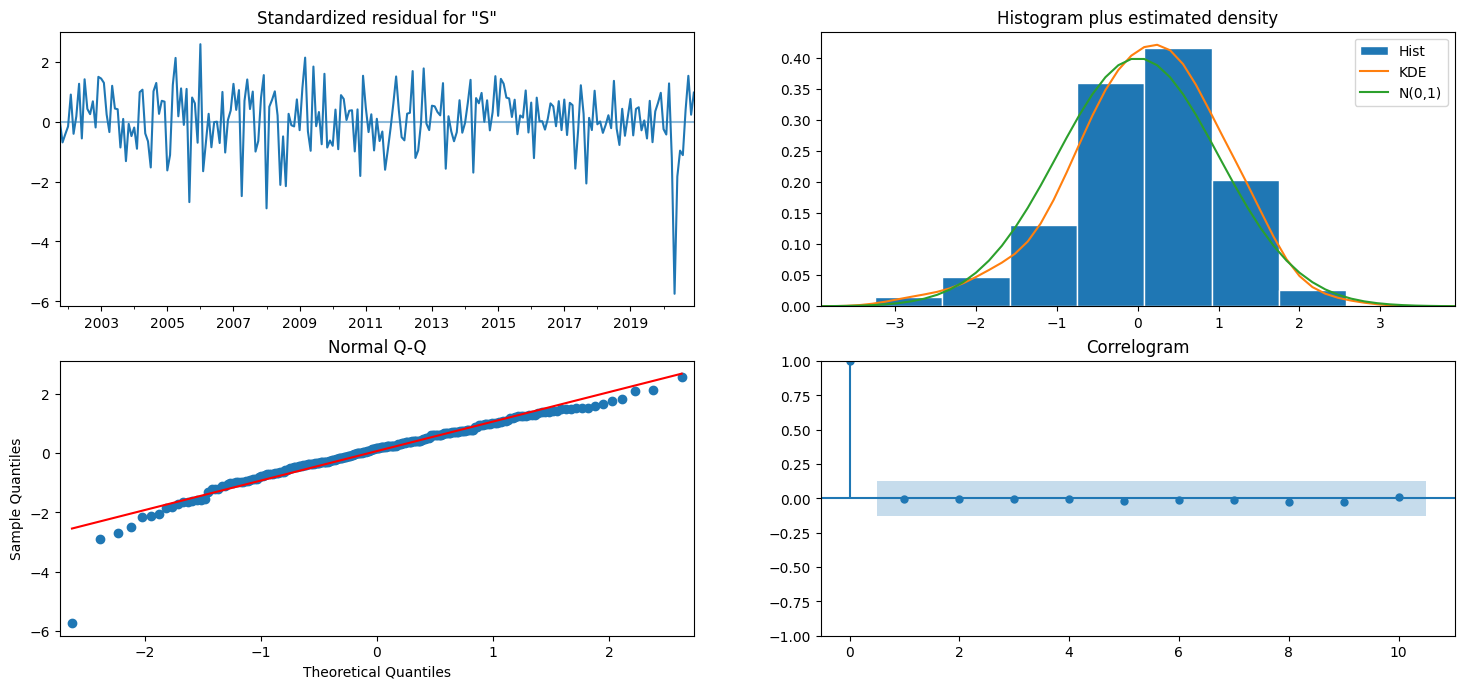

In [ ]:
resultado_m811.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
modelo411 = SARIMAX(superImplog, order=(4,1,1), enforce_stationarity=False, enforce_invertibility=False)
resultado_m411 = modelo411.fit()
print(resultado_m513.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64382D-02    |proj g|=  1.53835D-01

At iterate    5    f=  1.27181D-02    |proj g|=  8.48105D-02

At iterate   10    f= -2.02975D-03    |proj g|=  2.23601D-02

At iterate   15    f= -2.26122D-03    |proj g|=  4.14593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     18     25      1     0     0   5.813D-06  -2.261D-03
  F =  -2.2614213489880481E-003

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
        

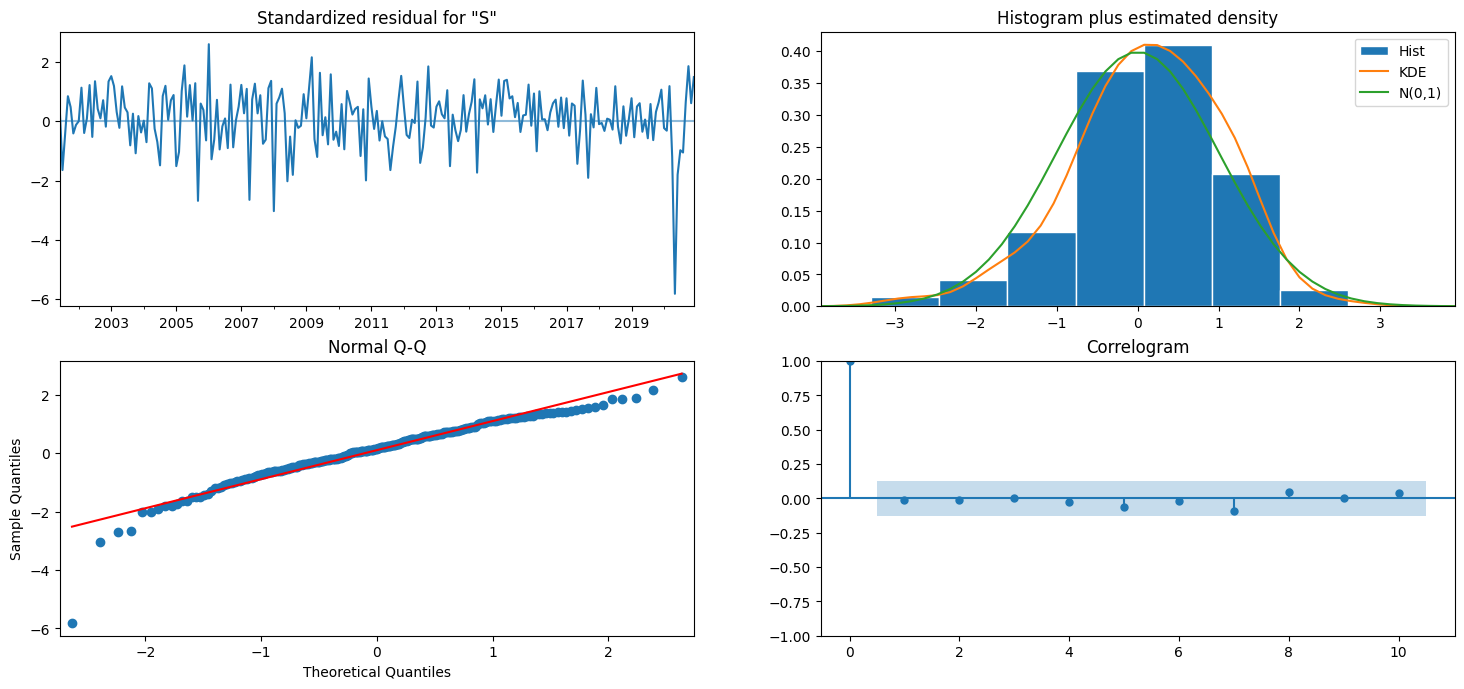

In [ ]:
resultado_m411.plot_diagnostics(figsize=(18, 8))
plt.show()

In [ ]:
print("Resultados de AIC (Akaike information criterion)")
print("Modelo 811=",resultado_m811.aic)
print("Modelo 411=",resultado_m411.aic)
print("Resultados de BIC (Bayesian information criterion)")
print("Modelo 811=",resultado_m811.bic)
print("Modelo 411=",resultado_m411.bic)

Resultados de AIC (Akaike information criterion)
Modelo 811= 13.65287639616194
Modelo 411= 10.914517752485736
Resultados de BIC (Bayesian information criterion)
Modelo 811= 48.07705350137988
Modelo 411= 31.67203083735069


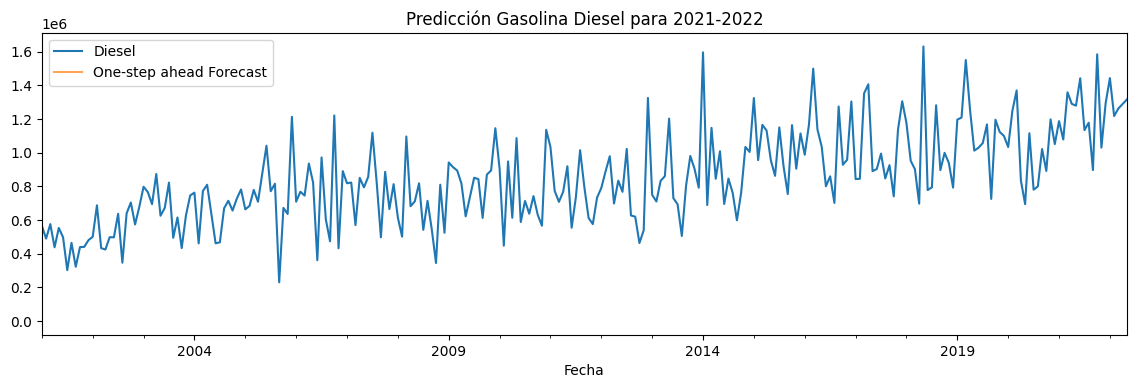

In [ ]:
dfTestDiesel = dfTestImportaciones['Diesel']
ImpDie = dfGeneralImportaciones[['Diesel']].copy()
pred = resultado_m411.get_prediction(start=dfTestDiesel.index[0], dynamic=False)
pred_ci = pred.conf_int()
ax = ImpDie['2001-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between( pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color='k', alpha=.2)
plt.title("Predicción Gasolina Diesel para 2021-2022")
plt.legend()
plt.show()

pred

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=32e457c4-31f9-4e67-9c0f-db9f6ef63e87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>